#### Task overview
We have a file that contains the gender, height and weight information. A typical line of the file is:

"Male",66.3162319187446,170.593858104457

We want to store all such lines in convenient data structures as three separate items and be able to manipulate them.

### Setup Steps

In [9]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()


#  ipython.magic("sx pip3 install torch") 
ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/Week0-part_gender_height_weight.csv")
ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/Week0-full_gender_height_weight.csv")
from IPython.display import HTML, display
# display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
print("Setup completed successfully")




Setup completed successfully


In [10]:
## We take a look at the contents of the file 
## by using the shell command head
!head Week0-full_gender_height_weight.csv

"Gender","Height","Weight"
"Male",73.847017017515,241.893563180437
"Male",68.7819040458903,162.310472521300
"Male",74.1101053917849,212.7408555565
"Male",71.7309784033377,220.042470303077
"Male",69.8817958611153,206.349800623871
"Male",67.2530156878065,152.212155757083
"Male",68.7850812516616,183.927888604031
"Male",68.3485155115879,167.971110489509
"Male",67.018949662883,175.92944039571


In [11]:
!tail Week0-part_gender_height_weight.csv

"Female",67.519733141364,163.490831665133
"Female",64.408825123937,139.604219139648
"Female",65.0716653479706,137.629857954212
"Female",61.5046182003953,122.286750997725
"Female",62.788759576151,120.013226214053
"Female",62.7434778192535,138.557941544823
"Female",63.290223692792,133.292934706536
"Female",62.7896653703462,132.230275678311
"Female",64.863385916734,138.484541094995
"Female",69.0342431307346,163.852461346571


We start by simply reading the file and storing it. But we want to skip the first line as it is a header and does not have data. We also want to store the data instead of merely printing it. But we will print the first ten items to verify that all is well.

In [0]:
PART_DATA = "Week0-part_gender_height_weight.csv"
FULL_DATA = "Week0-full_gender_height_weight.csv"

In [13]:
firstLine = True
data = []
for line in open(FULL_DATA):
    if firstLine:
        firstLine = False
    else:
        data.append(line)
print(data[:10])

['"Male",73.847017017515,241.893563180437\n', '"Male",68.7819040458903,162.310472521300\n', '"Male",74.1101053917849,212.7408555565\n', '"Male",71.7309784033377,220.042470303077\n', '"Male",69.8817958611153,206.349800623871\n', '"Male",67.2530156878065,152.212155757083\n', '"Male",68.7850812516616,183.927888604031\n', '"Male",68.3485155115879,167.971110489509\n', '"Male",67.018949662883,175.92944039571\n', '"Male",63.4564939783664,156.399676387112\n']


As you can see, there are some extraneous stuff:
  1. A \n at the end of each line
  2. The double quotes around the gender
  3. Also the line is a single string separated by commas
  
We handle these issues in the next version 

### TASK 1: Read the different fields from the raw data and create a list of list with appropriate datatypes for each column.

In [24]:
def read_data(filename):
  final_data = []
  # Add code here
  firstline = True
  with open(filename) as f:
    for l in f.readlines():
      if firstline == False:
        tmp = []
        x = l.split(',')
        tmp.append(x[0].replace('"',''))
        tmp.append(float(x[1].replace('"','')))
        tmp.append(float(x[2].replace('\n','')))
        final_data.append(tmp)
      firstline = False
  return final_data

data = read_data(FULL_DATA)
data

# NOTE: Data should be of format: [["Male", 73.23, 241.34], ["Female", 56.32, 154.344], ....]


[['Male', 73.847017017515, 241.893563180437],
 ['Male', 68.7819040458903, 162.3104725213],
 ['Male', 74.1101053917849, 212.7408555565],
 ['Male', 71.7309784033377, 220.042470303077],
 ['Male', 69.8817958611153, 206.349800623871],
 ['Male', 67.2530156878065, 152.212155757083],
 ['Male', 68.7850812516616, 183.927888604031],
 ['Male', 68.3485155115879, 167.971110489509],
 ['Male', 67.018949662883, 175.92944039571],
 ['Male', 63.4564939783664, 156.399676387112],
 ['Male', 71.1953822829745, 186.604925560358],
 ['Male', 71.6408051192206, 213.741169489411],
 ['Male', 64.7663291334055, 167.127461073476],
 ['Male', 69.2830700967204, 189.446181386738],
 ['Male', 69.2437322298112, 186.434168021239],
 ['Male', 67.6456197004212, 172.186930058117],
 ['Male', 72.4183166259878, 196.028506330482],
 ['Male', 63.974325721061, 172.88347020878],
 ['Male', 69.6400598997523, 185.98395757313],
 ['Male', 67.9360048540095, 182.426648013226],
 ['Male', 67.9150501938206, 174.115929081393],
 ['Male', 69.4394398680

Now we need to convert inches to cm, pounds to kg and round these to the nearest integer and we are done. Here is the final code to do the same.

In [26]:
def read_data_2(filename):
  final_data = []
  # Add code here, but also convert inches to cm and pounds to kg and round to nearest integer while reading.
  #NOTE: 1 inch = 2.54 cm, 1 pound = 0.4536 kg
  firstline = True
  with open(filename) as f:
    for l in f.readlines():
      if firstline == False:
        tmp = []
        x = l.split(',')
        tmp.append(x[0].replace('"',''))
        tmp.append(round(float(x[1].replace('"',''))*2.54))
        tmp.append(round(float(x[2].replace('\n',''))*0.4536))
        final_data.append(tmp)
      firstline = False
  return final_data

data = read_data_2(FULL_DATA)
data


[['Male', 188, 110],
 ['Male', 175, 74],
 ['Male', 188, 96],
 ['Male', 182, 100],
 ['Male', 177, 94],
 ['Male', 171, 69],
 ['Male', 175, 83],
 ['Male', 174, 76],
 ['Male', 170, 80],
 ['Male', 161, 71],
 ['Male', 181, 85],
 ['Male', 182, 97],
 ['Male', 165, 76],
 ['Male', 176, 86],
 ['Male', 176, 85],
 ['Male', 172, 78],
 ['Male', 184, 89],
 ['Male', 162, 78],
 ['Male', 177, 84],
 ['Male', 173, 83],
 ['Male', 173, 79],
 ['Male', 176, 90],
 ['Male', 168, 68],
 ['Male', 191, 104],
 ['Male', 172, 73],
 ['Male', 173, 87],
 ['Male', 175, 84],
 ['Male', 185, 94],
 ['Male', 171, 79],
 ['Male', 174, 70],
 ['Male', 174, 85],
 ['Male', 188, 97],
 ['Male', 182, 88],
 ['Male', 176, 93],
 ['Male', 177, 93],
 ['Male', 179, 88],
 ['Male', 175, 90],
 ['Male', 171, 83],
 ['Male', 167, 74],
 ['Male', 163, 74],
 ['Male', 173, 78],
 ['Male', 183, 88],
 ['Male', 166, 76],
 ['Male', 168, 73],
 ['Male', 171, 75],
 ['Male', 178, 86],
 ['Male', 173, 85],
 ['Male', 183, 95],
 ['Male', 176, 87],
 ['Male', 185, 96

One reason python is popular for Scientific Computing is the availability of libraries that do a lot of standard, grunt work in a few lines. We will see how the pandas library can make short work of all the above

In [0]:
import pandas as pd
pd.read_csv(PART_DATA)

As you can see, pandas gives you a nice display! It figured out the column titles and numbered the data also. It actually loads the data into a dataframe, and we can treat each column as a dictionary whose key is the column name and value is the actual data in the column. Note that the datatype has been inferred too.

In [0]:
data = pd.read_csv(FULL_DATA)
type(data['Gender']), type(data['Height'][1]), type(data['Weight'][30])

In [0]:
data["Gender"][21]

In [0]:
data.Weight

In [0]:
df = pd.read_csv(PART_DATA, header=0, names=["GEN", "HT", "WT"])
df.GEN

Pandas gives you even more flexibility as part of the read_csv function. We can attach converters to selected columns. 

In [0]:
def inches2cms(s):
    return int(float(s) * 2.54 + 0.5)
def pounds2kgs(s):
    return int(float(s) * 0.4536 + 0.5)

In [0]:
pd.read_csv(FULL_DATA, converters={'Height':inches2cms, 'Weight':pounds2kgs})

So our final code will be

In [52]:
import pandas as pd

def inches2cms(s):
    return int(float(s) * 2.54 + 0.5)
def pounds2kgs(s):
    return int(float(s) * 0.4536 + 0.5)
data = pd.read_csv(FULL_DATA, converters={'Height':inches2cms, 'Weight':pounds2kgs})
data[:10]

,Gender,Height,Weight
0,Male,188,110
1,Male,175,74
2,Male,188,96
3,Male,182,100
4,Male,177,94
5,Male,171,69
6,Male,175,83
7,Male,174,76
8,Male,170,80
9,Male,161,71


### Plotting Excercises


Plot the height and weight of the samples in a scatter plot with different markers/colors for male and female.

In [69]:
# Code here
import plotly.express as px
import plotly.graph_objects as go
x1=[]
x2=[]
y1=[]
y2=[]
for index, row in data.iterrows(): 
  if  row.Gender == "Male":
    x1.append(row.Height)
    y1.append(row.Weight)
  elif  row.Gender == "Female":
    x2.append(row.Height)
    y2.append(row.Weight)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x1, y=y1,
    name='Male',
    mode='markers',
    marker_color='rgba(152, 0, 0, .5)'
))


fig.add_trace(go.Scatter(
    x=x2, y=y2,
    mode='markers',
    name='Female',
    marker_color='rgba(255, 182, 193, .5)'
))


fig.show()

Plot the height and weight of all samples in a scatter plot. Include markers for people who are overweight. Men with weight > 100 ad women with weight > 80 can be considered overweight.

In [72]:
# Code here
# Code here
import plotly.express as px
import plotly.graph_objects as go
x1=[]
x2=[]
x3=[]
x4=[]
y1=[]
y2=[]
y3=[]
y4=[]

for index, row in data.iterrows(): 
  if  row.Gender == "Male" and row.Weight<100:
    x1.append(row.Height)
    y1.append(row.Weight)
  elif  row.Gender == "Male":
    x3.append(row.Height)
    y3.append(row.Weight)
  
  elif  row.Gender == "Female" and row.Weight<80:
    x2.append(row.Height)
    y2.append(row.Weight)
  elif  row.Gender == "Female" :
    x4.append(row.Height)
    y4.append(row.Weight)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x1, y=y1,
    name='Male',
    mode='markers',
    marker_color='rgba(152, 0, 0, .5)'
))


fig.add_trace(go.Scatter(
    x=x2, y=y2,
    mode='markers',
    name='Female',
    marker_color='rgba(25, 182, 193, .5)'
))
fig.add_trace(go.Scatter(
    x=x3, y=y3,
    name='Male Overweight',
    mode='markers',
    marker_color='rgba(152, 34, 0, .5)'
))


fig.add_trace(go.Scatter(
    x=x4, y=y4,
    mode='markers',
    name='Female Overweight',
    marker_color='rgba(25, 18, 193, .5)'
))



fig.show()

Plot box plots for height in men and women. You can read more about box plots here: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

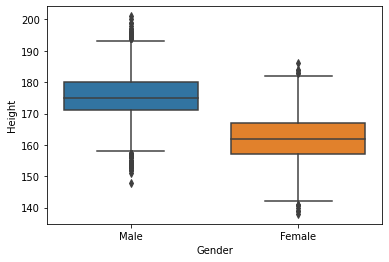

In [30]:
# Code here
import seaborn
seaborn.boxplot(x="Gender",y="Height",data=data)
